**Máquina de Soporte Vectorial**

Algoritmo supervisado comúnmente utilizado para la clasificación de datos.

Ventajas:



*   Cantidad de datos a utilizar
*   Alta velocidad de procesamiento
*   Utiliza subconjuntos de entrenamiento para contrar soluciones
*   Su arquitectura puede ser automatica o personalizada.  



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:

dataEMG = pd.read_csv('/content/drive/MyDrive/IA/Investigacion /EMG/datasetV2.csv')
dataEMG

,Media,Varianza,Desviacion,Rms,IEMG,LongitudFO,Estado
0,-0.000006,1.557382e-04,0.012480,0.012467,4.276611,1.011475,1
1,0.000046,1.556705e-04,0.012477,0.012464,4.273682,1.009521,1
2,0.000068,1.556433e-04,0.012476,0.012463,4.269775,1.010742,1
3,0.000062,1.556529e-04,0.012476,0.012464,4.271729,1.009521,1
4,0.000019,1.558645e-04,0.012485,0.012472,4.284912,1.015381,1
...,...,...,...,...,...,...,...
39560,-0.000307,1.114762e-06,0.001056,0.001098,0.390869,0.293457,0
39561,-0.000326,1.035173e-06,0.001017,0.001067,0.381104,0.277588,0
39562,-0.000246,1.163123e-06,0.001078,0.001105,0.407715,0.280029,0
39563,-0.000379,1.073104e-06,0.001036,0.001102,0.396973,0.304443,0


In [27]:
dataEMG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39565 entries, 0 to 39564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Media       39565 non-null  float64
 1   Varianza    39565 non-null  float64
 2   Desviacion  39565 non-null  float64
 3   Rms         39565 non-null  float64
 4   IEMG        39565 non-null  float64
 5   LongitudFO  39565 non-null  float64
 6   Estado      39565 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 2.1 MB


In [28]:
dataEMG['Estado'].unique()

array([1, 0])

In [29]:
dataEMG.describe()

,Media,Varianza,Desviacion,Rms,IEMG,LongitudFO,Estado
count,39565.000000,3.956500e+04,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000
mean,-0.000214,1.583889e-02,0.076077,0.076166,29.652541,6.260662,0.459598
std,0.002510,2.955847e-02,0.100257,0.100063,40.170037,8.222938,0.498371
min,-0.021539,3.760508e-07,0.000613,0.000614,0.222900,0.112305,0.000000
25%,-0.000537,1.156486e-06,0.001075,0.001153,0.440186,0.314453,0.000000
50%,-0.000134,5.490102e-05,0.007410,0.007527,2.606689,0.597412,0.000000
75%,0.000343,2.008698e-02,0.141729,0.141602,54.068848,11.170410,1.000000
max,0.016929,2.787139e-01,0.527934,0.527519,226.143799,44.894531,1.000000


Pairplot


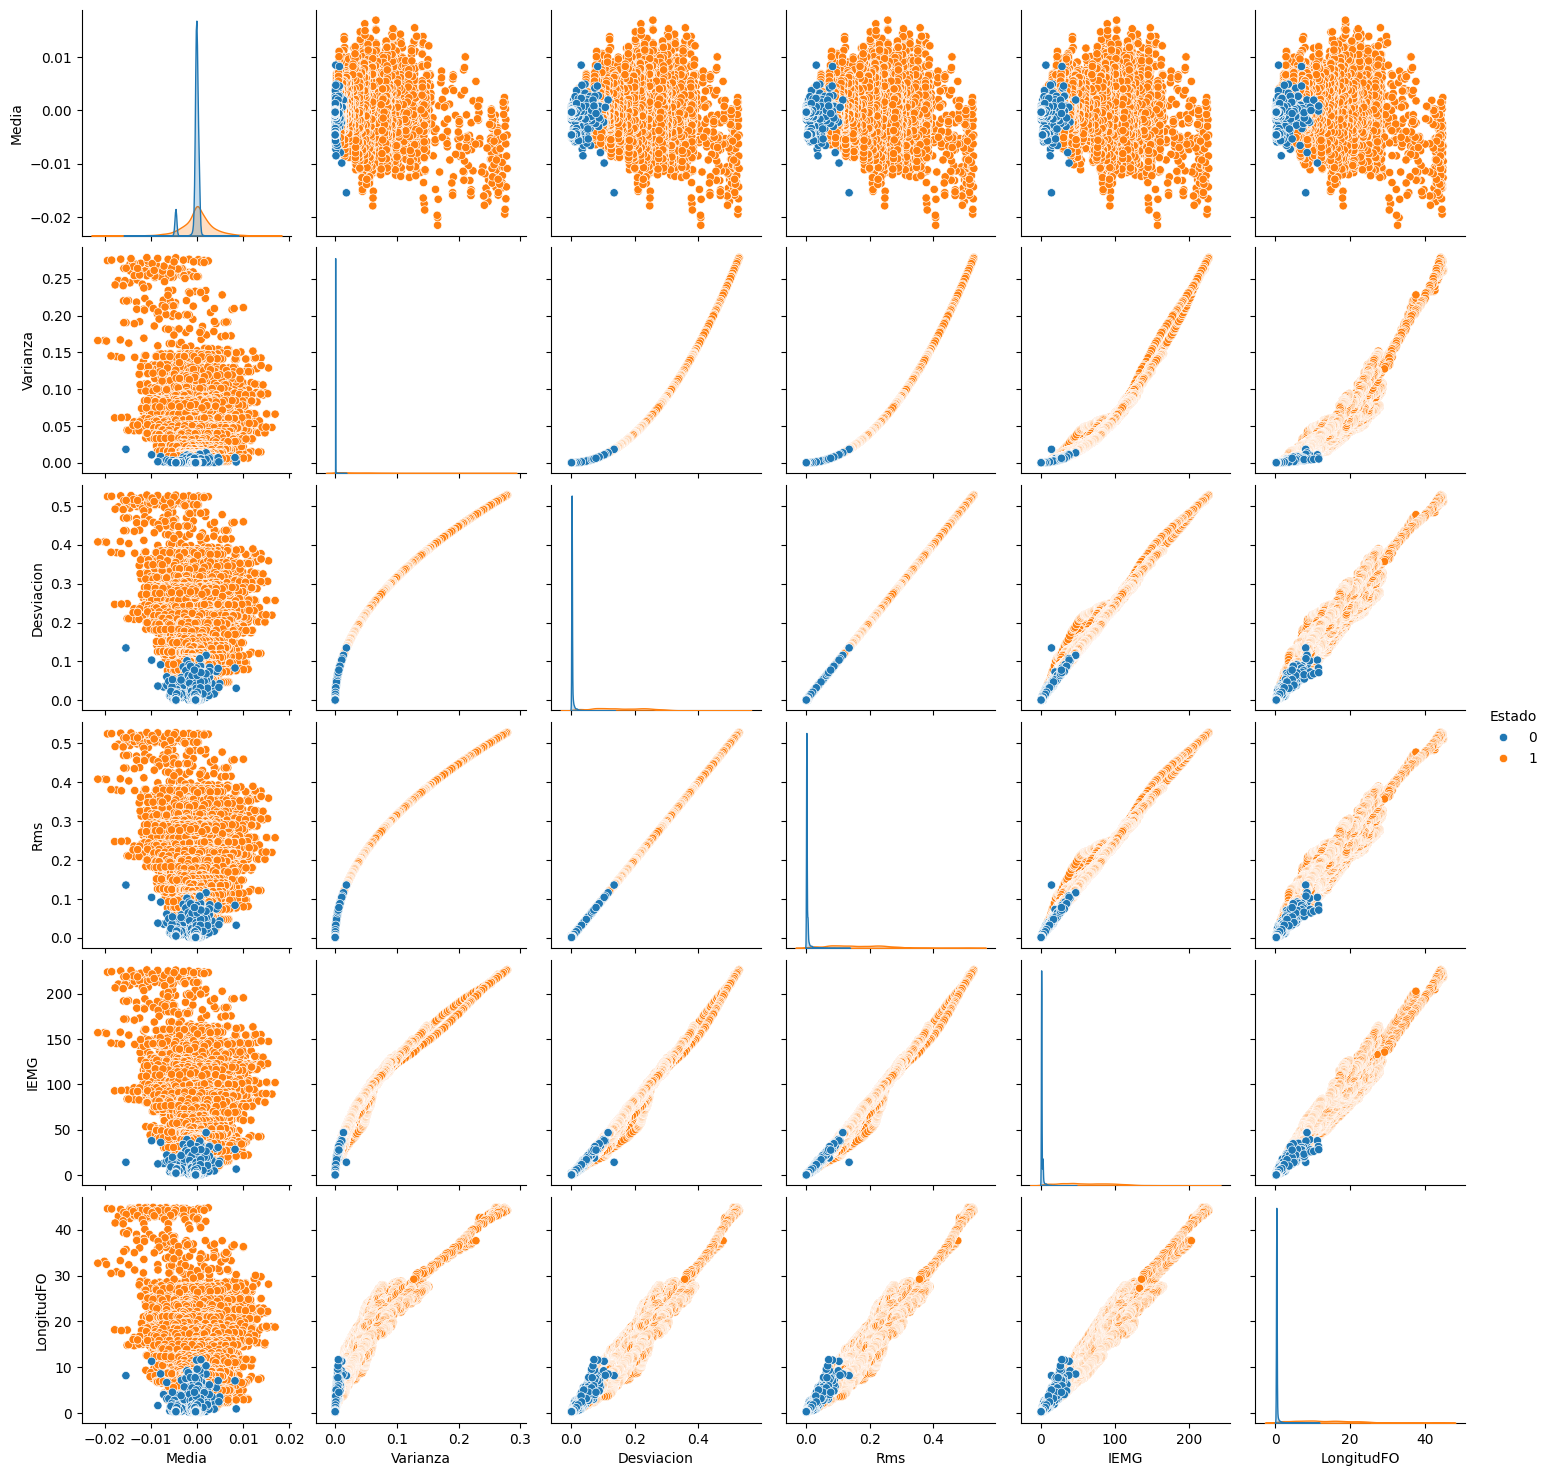

In [7]:
sns.pairplot(dataEMG, hue='Estado')

Crear Modelo de SVM

Es un algoritmo de aprendizaje supervisado utilizado en el campo de la clasificación. Su objetivo principal es encontrar un hiperplano que mejor separe dos clases en un espacio de características. Este hiperplano es elegido de manera que maximice la distancia (margen) entre las muestras de datos más cercanas de las dos clases, a las que se hace referencia como "vectores de soporte".

El SVC es particularmente efectivo en la clasificación de datos en espacios de alta dimensión y puede utilizar diferentes funciones de núcleo para manejar datos no linealmente separables. Es una técnica comúnmente utilizada en problemas de clasificación binaria y puede extenderse a la clasificación multiclase.
Este algoritmo combina el preprocesamiento de datos (escalado) con la búsqueda de hiperparámetros para encontrar la mejor configuración para un clasificador SVC.

El resultado final es un modelo entrenado y evaluado en función de la configuración óptima encontrada en la búsqueda de hiperparámetros.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = dataEMG.drop('Estado',axis=1)

In [10]:
y = dataEMG['Estado']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1601)

Importar la libreria para svm

In [12]:
from sklearn.svm import SVC

In [13]:
modelo = SVC(probability=True)

In [14]:
modelo.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
Predicciones = modelo.predict(x_test)

In [ ]:
Predicciones

In [17]:
x_test, y_test

(          Media      Varianza  Desviacion       Rms       IEMG  LongitudFO
 15108  0.002268  1.922047e-02    0.138638  0.138518  55.820557   12.250732
 38429 -0.001159  4.534007e-04    0.021293  0.021303   8.859863    1.601807
 26153 -0.000431  9.565601e-07    0.000978  0.001068   0.368652    0.295166
 33159 -0.005029  2.130537e-05    0.004616  0.006823   2.777344    0.509766
 12626  0.000191  4.821509e-04    0.021958  0.021937   6.846191    1.474365
 ...         ...           ...         ...       ...        ...         ...
 24466 -0.000326  8.689957e-07    0.000932  0.000987   0.339600    0.244873
 11548 -0.000061  3.799721e-02    0.194929  0.194734  76.950928   16.077881
 34483 -0.000095  1.572952e-06    0.001254  0.001256   0.462402    0.318604
 13875 -0.003145  4.631393e-02    0.215207  0.215015  88.135742   15.482910
 25571 -0.004749  1.064307e-06    0.001032  0.004859   2.379150    0.272461
 
 [11870 rows x 6 columns],
 15108    1
 38429    0
 26153    0
 33159    0
 12626    1

Importar las librerias para el reporte de clasificación y la matriz de confusión

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6429
           1       0.97      0.96      0.97      5441

    accuracy                           0.97     11870
   macro avg       0.97      0.97      0.97     11870
weighted avg       0.97      0.97      0.97     11870



In [20]:
print(confusion_matrix(y_test,Predicciones))

[[6261  168]
 [ 193 5248]]


<Axes: >

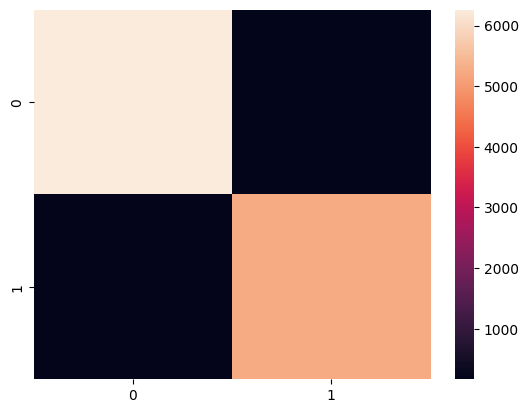

In [21]:
sns.heatmap(confusion_matrix(y_test, Predicciones))

In [22]:
#import pickle

#model_path = '/content/drive/MyDrive/IA/Investigacion /EMG/Maquina de soporte vectorial /SVM_model.pkl'

#with open(model_path, 'wb') as f:
#    pickle.dump(modelo, f)

#print(f"Model saved to {model_path}")


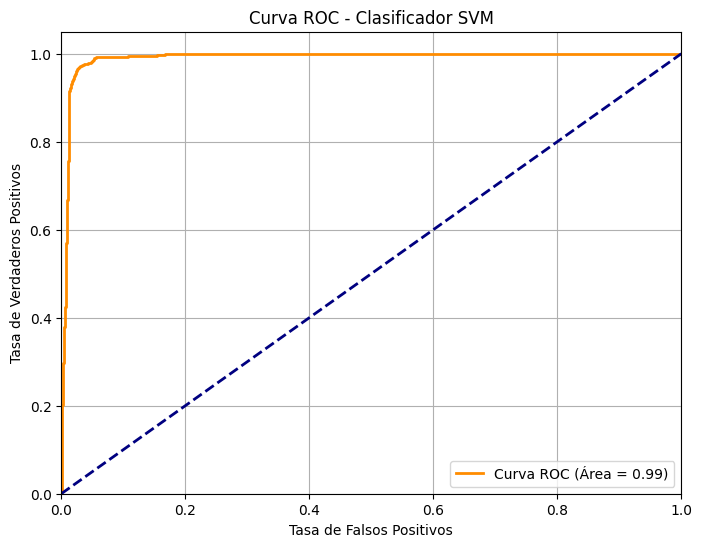

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Re-initialize and fit the model with probability=False
#modelo = SVC(probability=False)
#modelo.fit(x_train, y_train)

# Verifica si es clasificación binaria
if len(np.unique(y_test)) == 2:
    # Obtener los valores de la función de decisión
    y_score = modelo.decision_function(x_test)

    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - Clasificador SVM')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("La curva ROC requiere un problema de clasificación binaria.")

In [30]:
import time
import sys

# Calculate inference time
start_time = time.time()
modelo.predict(x_test)
end_time = time.time()
inference_time = end_time - start_time
print(f"Tiempo de inferencia: {inference_time:.4f} segundos")

# Calculate memory usage of the model
model_memory_bytes = sys.getsizeof(modelo)
print(f"Consumo de memoria del modelo (bytes): {model_memory_bytes}")

# Note: Measuring RAM usage and disk space directly within Colab is not straightforward for a single model object in this way.
# RAM usage is a system-level metric.
# Disk space would involve saving the model to disk and then checking the file size (as commented out in the previous cell).

# If you want to estimate disk space without saving the file uncomment the following code
# import pickle
# model_size_bytes = sys.getsizeof(pickle.dumps(modelo))
# print(f"Espacio estimado en disco (bytes, sin guardar): {model_size_bytes}")

Tiempo de inferencia: 2.0831 segundos
Consumo de memoria del modelo (bytes): 48


In [34]:
import time
import sys
import resource
import os

# Evaluate inference time
start_time = time.time()
predictions_time = modelo.predict(x_test)
end_time = time.time()
inference_time = end_time - start_time
print(f"Tiempo de inferencia: {inference_time:.4f} segundos")

# Evaluate memory consumption (approximate)
# This will give the size of the model object in bytes
model_memory = sys.getsizeof(modelo)
print(f"Consumo de memoria del modelo (aproximado): {model_memory} bytes")

# Evaluate RAM usage
# Note: This gives the maximum resident set size in kilobytes
# The units might vary depending on the system (e.g., resource.RUSAGE_SELF)
ram_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
print(f"Uso de RAM (máximo): {ram_usage} KB")

# Evaluate disk space used by the model file
model_file_path = '/content/drive/MyDrive/IA/Investigacion /EMG/Maquina de soporte vectorial /SVM_model.pkl'
if os.path.exists(model_file_path):
    disk_space = os.path.getsize(model_file_path)
    print(f"Espacio en disco utilizado por el modelo: {disk_space} bytes")
else:
    print(f"El archivo del modelo '{model_file_path}' no fue encontrado.")

Tiempo de inferencia: 1.1408 segundos
Consumo de memoria del modelo (aproximado): 48 bytes
Uso de RAM (máximo): 588720 KB
Espacio en disco utilizado por el modelo: 150918 bytes
